In [1]:
# importing necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

import pickle

In [2]:
# importing Dataset
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# checking for null values
df.isnull().sum()

# no null values found

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [4]:
# Observing dataset

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# We can observe that, some of the columns contains 0 as minimum value
# (e.g. 'Insulin', 'Glucose', and 'BloodPressure', etc.)
# replacing '0' with mean value for each column containing 0 as min value
# except 'Pregnancies'

In [6]:
df['Glucose']= df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']= df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']= df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']= df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']= df['BMI'].replace(0,df['BMI'].mean())

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


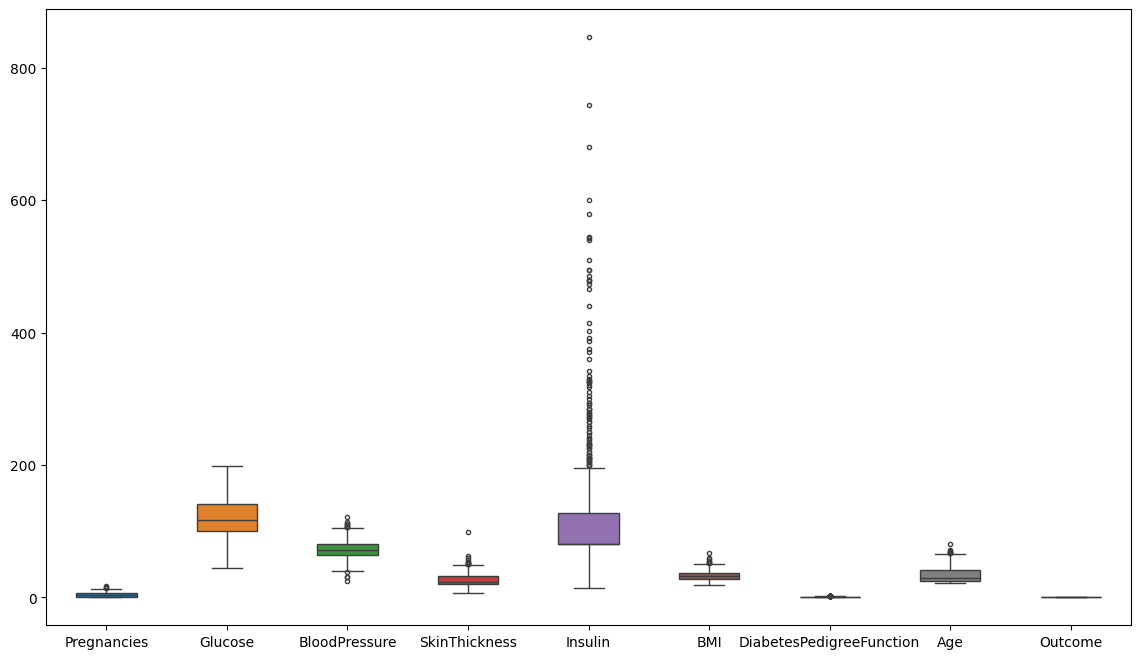

In [8]:
# Checking for Outliers
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)
plt.show()

In [9]:
# observation, the column 'Insulin' contains the highest numbers of outliers.

In [10]:
# segregating the data
X = df.drop(columns= ['Outcome'])
y= df['Outcome']

In [11]:
# train_test_spliting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

X_train.shape, y_train.shape

((576, 8), (576,))

In [12]:
# Standard Scaling- Standardization

def scaler_standard(X_train, X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #saving the model
    file = open('StandardScalar.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled, X_test_scaled

In [13]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

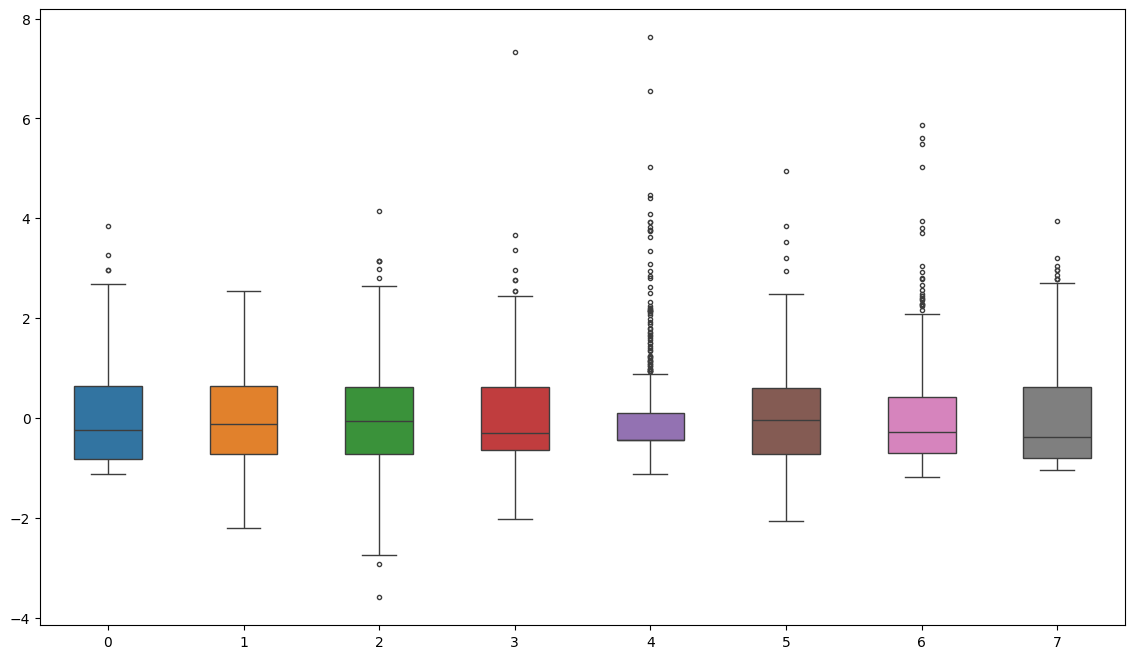

In [14]:
# Checking for Outliers
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(data=X_train_scaled, width= 0.5,ax=ax,  fliersize=3)
plt.show()

## Prediction with Logistic Regression (without GirdSearchCV)

In [15]:
LogReg = LogisticRegression()

LogReg.fit(X_train_scaled,y_train)

LogisticRegression()

In [16]:
y_pred = LogReg.predict(X_test_scaled)

In [17]:
accuracy_sc = accuracy_score(y_test,y_pred)

accuracy_sc

0.796875

In [18]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[117,  13],
       [ 26,  36]])

## Prediction with Logistic Regression (with GirdSearchCV)

In [19]:
### With GridSearchCV

## Hyperparameter Tuning

## parameter grid
parameters = {
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [20]:
LogReg_gcv = LogisticRegression()

clf = GridSearchCV(LogReg_gcv,                # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [21]:
y_pred_gcv = clf.predict(X_test_scaled)

In [22]:
# accuracy score in this case
accuracy_sc_gcv = accuracy_score(y_test,y_pred)

accuracy_sc_gcv

0.796875

In [23]:
# Confusion Matrix with GridCV

conf_mat_gcv = confusion_matrix(y_test,y_pred)
conf_mat_gcv

array([[117,  13],
       [ 26,  36]])

In [24]:
true_positive = conf_mat_gcv[0][0]
false_positive = conf_mat_gcv[0][1]
false_negative = conf_mat_gcv[1][0]
true_negative = conf_mat_gcv[1][1]

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print('Accuracy : ', Accuracy)

Precision = true_positive/(true_positive+false_positive)
print('Precision : ',Precision)

Recall = true_positive/(true_positive+false_negative)
print('Recall : ',Recall)

F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print('F1_Score : ',F1_Score)

Accuracy :  0.796875
Precision :  0.9
Recall :  0.8181818181818182
F1_Score :  0.8571428571428572


In [25]:
# pickling the file

file = open('ModelForPrediction.pkl','wb')
pickle.dump(LogReg,file)
file.close()